# Task 1

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

<ipython-input-1-c311f33ae653>:46: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  features_trainb = modelb.predict_generator(train_generatorb,(Len_C1_Trainb+Len_C2_Trainb) // batch_size, max_queue_size=1)


Found 96 images belonging to 2 classes.


<ipython-input-1-c311f33ae653>:55: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  features_validationb = modelb.predict_generator(validation_generatorb,(Len_C1_Trainb+Len_C2_Trainb) // batch_size, max_queue_size=1)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7, 7, 512)]       0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,211,521
Trainable params: 3,211,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
139/139 [==============================

139/139 [==============================] - 0s 2ms/step - loss: 1.9624e-04 - binary_accuracy: 1.0000 - val_loss: 1.8290e-04 - val_binary_accuracy: 1.0000
Epoch 95/150
139/139 [==============================] - 0s 3ms/step - loss: 1.9092e-04 - binary_accuracy: 1.0000 - val_loss: 2.0140e-04 - val_binary_accuracy: 1.0000
Epoch 96/150
139/139 [==============================] - 0s 3ms/step - loss: 2.5603e-04 - binary_accuracy: 1.0000 - val_loss: 1.6335e-04 - val_binary_accuracy: 1.0000
Epoch 97/150
139/139 [==============================] - 0s 2ms/step - loss: 1.7740e-04 - binary_accuracy: 1.0000 - val_loss: 1.5857e-04 - val_binary_accuracy: 1.0000
Epoch 98/150
139/139 [==============================] - 0s 2ms/step - loss: 2.1222e-04 - binary_accuracy: 1.0000 - val_loss: 1.6306e-04 - val_binary_accuracy: 1.0000
Epoch 99/150
139/139 [==============================] - 0s 2ms/step - loss: 1.5671e-04 - binary_accuracy: 1.0000 - val_loss: 1.5536e-04 - val_binary_accuracy: 1.0000
Epoch 100/150
139

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

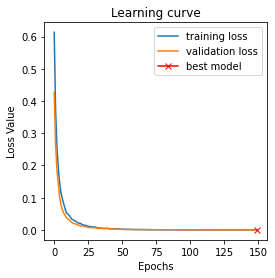

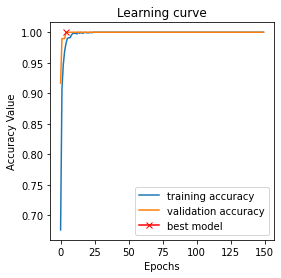

In [1]:
# BONE IMAGES
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D, Input
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import applications
import numpy as np
from Functions import plotcurve

def get_length(Path, Pattern):
# Pattern: name of the subdirectory
    Length = len(os.listdir(os.path.join(Path, Pattern)))
    return Length



# parameters (TODO)
train_data_dirb = '../Data/Lab2/Bone/train/'
validation_data_dirb ='../Data/Lab2/Bone/validation/' 
img_width,img_height = 224,224
epochs = 150
batch_size = 8
LR = 1e-5
img_ch=1

# number of data for each class
Len_C1_Trainb = get_length(train_data_dirb,'AFF')
Len_C2_Trainb = get_length(train_data_dirb,'NFF')
Len_C1_Valb = get_length(validation_data_dirb,'AFF')
Len_C2_Valb = get_length(validation_data_dirb,'NFF')

# loading the pre-trained model
# include top: false means that the dense layers at the top of the network will not be used. 
modelb = applications.VGG16(include_top=False, weights='imagenet')
modelb.summary()

## Feature extraction from pretrained VGG (training data)
datagen = ImageDataGenerator(rescale=1. / 255)

train_generatorb = datagen.flow_from_directory(train_data_dirb,target_size=(img_width, img_height),batch_size=batch_size,class_mode=None,shuffle=False)

# Extracting the features from the loaded images
features_trainb = modelb.predict_generator(train_generatorb,(Len_C1_Trainb+Len_C2_Trainb) // batch_size, max_queue_size=1)

### To DO: Feature extraction from pretrained VGG (validation data)

datagenvb = ImageDataGenerator(rescale=1. / 255)

validation_generatorb = datagenvb.flow_from_directory(validation_data_dirb,target_size=(img_width, img_height),batch_size=batch_size,class_mode=None,shuffle=False)

# Extracting the features from the loaded images
features_validationb = modelb.predict_generator(validation_generatorb,(Len_C1_Trainb+Len_C2_Trainb) // batch_size, max_queue_size=1)


# training a small MLP with extracted features from the pre-trained model
# In fact this MLP will be used instead of the dense layers of the VGG model 
# and only this MLP will be trained on the dataset.
train_datab = features_trainb
train_labelsb = np.array([0] * int(Len_C1_Trainb) + [1] * int(Len_C2_Trainb))

validation_datab = features_validationb
validation_labelsb = np.array([0] * int(Len_C1_Valb) + [1] * int(Len_C2_Valb))


# TODO: Building the MLP model

def MLP(img_width, img_height, img_ch):
    inputs_layer = Input(shape=(7, 7, 512))
    x = Flatten()(inputs_layer)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    out = Dense(1, activation="sigmoid")(x)
    
    # TODO
    clf = tf.keras.Model(inputs=inputs_layer, outputs=out)
    clf.summary()
    return clf

# TODO: Compile and train the model, plot learning curves

mlp_modelb = MLP(img_width, img_height, img_ch)
mlp_modelb.compile(optimizer=tf.keras.optimizers.Adam(LR), loss='binary_crossentropy', metrics=['binary_accuracy'])
clf_histb = mlp_modelb.fit(train_datab, train_labelsb, validation_data=(validation_datab, validation_labelsb), epochs=epochs, batch_size=batch_size)
plotcurve(clf_histb,'binary')

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

<ipython-input-2-28442657b59c>:29: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  features_train = model.predict_generator(train_generator,(Len_C1_Train+Len_C2_Train) // batch_size, max_queue_size=1)


Found 200 images belonging to 2 classes.


<ipython-input-2-28442657b59c>:38: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  features_validation = model.predict_generator(validation_generator,(Len_C1_Train+Len_C2_Train) // batch_size, max_queue_size=1)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 7, 7, 512)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               3211392   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,211,521
Trainable params: 3,211,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
125/125 [============================

Epoch 96/150
125/125 [==============================] - 0s 2ms/step - loss: 0.1314 - binary_accuracy: 0.9630 - val_loss: 0.3060 - val_binary_accuracy: 0.8650
Epoch 97/150
125/125 [==============================] - 0s 2ms/step - loss: 0.1366 - binary_accuracy: 0.9640 - val_loss: 0.3063 - val_binary_accuracy: 0.8650
Epoch 98/150
125/125 [==============================] - 0s 3ms/step - loss: 0.1341 - binary_accuracy: 0.9580 - val_loss: 0.3026 - val_binary_accuracy: 0.8600
Epoch 99/150
125/125 [==============================] - 0s 3ms/step - loss: 0.1253 - binary_accuracy: 0.9620 - val_loss: 0.3033 - val_binary_accuracy: 0.8600
Epoch 100/150
125/125 [==============================] - 0s 3ms/step - loss: 0.1260 - binary_accuracy: 0.9660 - val_loss: 0.3028 - val_binary_accuracy: 0.8600
Epoch 101/150
125/125 [==============================] - 0s 3ms/step - loss: 0.1268 - binary_accuracy: 0.9610 - val_loss: 0.3043 - val_binary_accuracy: 0.8600
Epoch 102/150
125/125 [===========================

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

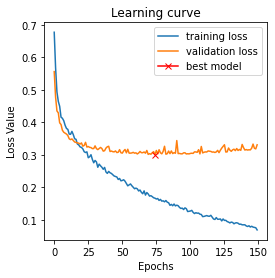

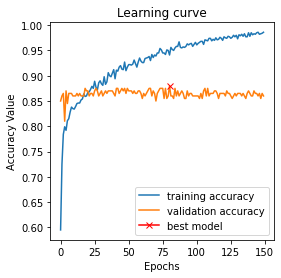

In [2]:
#SKIN

# parameters (TODO)
train_data_dir = '../Data/Lab2/Skin/train/'
validation_data_dir ='../Data/Lab2/Skin/validation/' 
img_width,img_height = 224,224
epochs = 150
batch_size = 8
LR = 1e-5
img_ch=1

# number of data for each class
Len_C1_Train = get_length(train_data_dir,'Mel')
Len_C2_Train = get_length(train_data_dir,'Nevi')
Len_C1_Val = get_length(validation_data_dir,'Mel')
Len_C2_Val = get_length(validation_data_dir,'Nevi')

# loading the pre-trained model
# include top: false means that the dense layers at the top of the network will not be used. 
model = applications.VGG16(include_top=False, weights='imagenet')
model.summary()

## Feature extraction from pretrained VGG (training data)
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(train_data_dir,target_size=(img_width, img_height),batch_size=batch_size,class_mode=None,shuffle=False)

# Extracting the features from the loaded images
features_train = model.predict_generator(train_generator,(Len_C1_Train+Len_C2_Train) // batch_size, max_queue_size=1)

### To DO: Feature extraction from pretrained VGG (validation data)

datagenv = ImageDataGenerator(rescale=1. / 255)

validation_generator = datagenv.flow_from_directory(validation_data_dir,target_size=(img_width, img_height),batch_size=batch_size,class_mode=None,shuffle=False)

# Extracting the features from the loaded images
features_validation = model.predict_generator(validation_generator,(Len_C1_Train+Len_C2_Train) // batch_size, max_queue_size=1)


# training a small MLP with extracted features from the pre-trained model
# In fact this MLP will be used instead of the dense layers of the VGG model 
# and only this MLP will be trained on the dataset.
train_data = features_train
train_labels = np.array([0] * int(Len_C1_Train) + [1] * int(Len_C2_Train))

validation_data = features_validation
validation_labels = np.array([0] * int(Len_C1_Val) + [1] * int(Len_C2_Val))

# TODO: Compile and train the model, plot learning curves

mlp_model_skin = MLP(img_width, img_height, img_ch)
mlp_model_skin.compile(optimizer=tf.keras.optimizers.Adam(LR), loss='binary_crossentropy', metrics=['binary_accuracy'])
clf_hist = mlp_model_skin.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), epochs=epochs, batch_size=batch_size)
plotcurve(clf_hist,'binary')

_Visualizing Activation Maps_

# Task 3

Found 1112 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                             

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/80
139/139 [==============================] - ETA: 0s - batch: 69.0000 - size: 8.0000 - loss: 0.6785 - binary_accuracy: 0.5962

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


139/139 [==============================] - 52s 356ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.6785 - binary_accuracy: 0.5962 - val_loss: 0.6759 - val_binary_accuracy: 0.5417
Epoch 2/80
139/139 [==============================] - 33s 241ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.5455 - binary_accuracy: 0.7617 - val_loss: 0.6495 - val_binary_accuracy: 0.8125
Epoch 3/80
139/139 [==============================] - 33s 238ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.4740 - binary_accuracy: 0.7950 - val_loss: 0.3938 - val_binary_accuracy: 0.8958
Epoch 4/80
139/139 [==============================] - 33s 239ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.4504 - binary_accuracy: 0.8192 - val_loss: 0.5964 - val_binary_accuracy: 0.7917
Epoch 5/80
139/139 [==============================] - 33s 240ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.4346 - binary_accuracy: 0.8112 - val_loss: 0.4681 - val_binary_accuracy: 0.8542
Epoch 6/80
139/139 [==============================] - 32

Epoch 44/80
139/139 [==============================] - 31s 222ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.2332 - binary_accuracy: 0.9074 - val_loss: 0.2377 - val_binary_accuracy: 0.9167
Epoch 45/80
139/139 [==============================] - 32s 234ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.2305 - binary_accuracy: 0.9209 - val_loss: 0.4515 - val_binary_accuracy: 0.8229
Epoch 46/80
139/139 [==============================] - 32s 234ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.2606 - binary_accuracy: 0.8876 - val_loss: 0.1990 - val_binary_accuracy: 0.9271
Epoch 47/80
139/139 [==============================] - 31s 225ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.2152 - binary_accuracy: 0.9218 - val_loss: 0.3733 - val_binary_accuracy: 0.8750
Epoch 48/80
139/139 [==============================] - 32s 231ms/step - batch: 69.0000 - size: 8.0000 - loss: 0.2312 - binary_accuracy: 0.9137 - val_loss: 0.3567 - val_binary_accuracy: 0.8333
Epoch 49/80
139/139 [===================

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

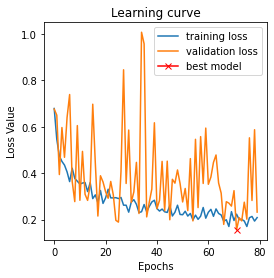

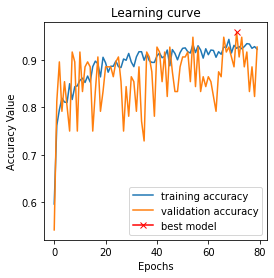

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D, Input, Conv2D
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import applications
from skimage.color import rgb2gray
import numpy as np
from Functions import plotcurve
tf.compat.v1.disable_eager_execution()


# Define data directories
train_data_dir3 = '../Data/Lab2/Bone/train/'
validation_data_dir3 = '../Data/Lab2/Bone/validation/'

# Data augmentation parameters
batch_size = 8
image_size = (128, 128)
epochs = 80
learning_rate = 1e-3

# Data augmentation
train_datagen3 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen3 = ImageDataGenerator(rescale=1./255)

# Load and preprocess the data
train_generator3 = train_datagen3.flow_from_directory(
    train_data_dir3,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',color_mode='grayscale'
)

validation_generator3 = validation_datagen3.flow_from_directory(
    validation_data_dir3,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',color_mode='grayscale'
)


# Define the VGG16-based model
def vgg16(img_width, img_height, img_ch, base):
    inputs_layer = Input(shape=(img_width, img_height, img_ch))
    x = Conv2D(filters=base, kernel_size=(3, 3), activation='relu', strides=1, padding='same')(inputs_layer)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=base*2, kernel_size=(3, 3), activation='relu', strides=1, padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=base*4, kernel_size=(3, 3), activation='relu', strides=1, padding='same')(x)
    Last_ConvLayer = Conv2D(filters=base*4, kernel_size=(3, 3), activation='relu', strides=1, padding='same',name='Last_ConvLayer')(x)
    x = MaxPooling2D(pool_size=(2, 2))(Last_ConvLayer)
    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(rate=0.4)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(rate=0.4)(x)
    out = Dense(2, activation='softmax')(x)
    
    clf = tf.keras.Model(inputs=inputs_layer, outputs=out)
    clf.summary()
    return clf

# Create the model
Base=8
model3 = vgg16(128, 128, 1, Base)

# Compile the model
model3.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(lr=learning_rate),
    metrics=['binary_accuracy'])

# Train the model
history3 = model3.fit(
    train_generator3,
    steps_per_epoch=train_generator3.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator3,
    validation_steps=validation_generator3.samples // batch_size)

# Evaluate the model

plotcurve(history3, 'binary')


the predicted class label is 1


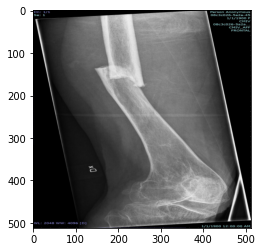

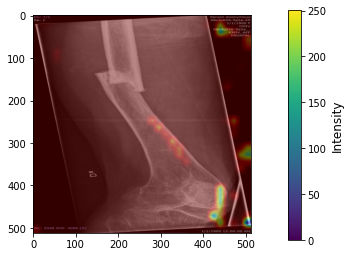

In [7]:
from tensorflow.keras import backend as K
from skimage.io import imread
from skimage.transform import resize
import cv2
import matplotlib.pyplot as plt


sample_dir = '../Data/Lab2/Bone/train/AFF/17.jpg'
img = imread(sample_dir)
Img = img[:,:,0]
img = img/255
img = resize(Img, (128, 128), anti_aliasing =True).astype('float32') 
img = np.expand_dims(img, axis = 2)
img = np.expand_dims(img, axis = 0)
preds = model3.predict(img)
class_idx = np.argmax(preds[0])
print('the predicted class label is {}'.format(class_idx))
class_output = model3.output[:, class_idx]
last_conv_layer = model3.get_layer("Last_ConvLayer")

Base=8
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model3.input], [pooled_grads,last_conv_layer.output[0]]) 
pooled_grads_value, conv_layer_output_value = iterate([img])
for i in range(Base*4):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

img_ = cv2.imread(sample_dir)
img_ = cv2.resize(img_, (512, 512), interpolation = cv2.INTER_AREA)
#img = img/255
heatmap = cv2.resize(heatmap, (img_.shape[1], img_.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img_, 0.6, heatmap, 0.4, 0)
plt.figure()
plt.imshow(img_)
plt.figure()
plt.imshow(superimposed_img)
cax = plt.axes([0.85, 0.1, 0.03, 0.8])  # [x, y, width, height]
cbar = plt.colorbar(orientation='vertical', cax=cax)
cbar.set_label('Intensity', fontsize=12)  # Label for the colorbar

plt.show()


# Task 4

In [ ]:
#BCE
from Unet import conv_block, get_unet
from Functions import plotcurve
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout, ReLU, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Define your parameters
base = 32
img_h = 256
img_w = 256
img_ch = 1
batch_size = 8
learning_rate = 0.0001
dropout = True
batch_norm = False
num_epochs = 150

# Set data directory
data_dir4 = '../Data/Lab3/X_ray/'

# List all image and mask file paths
image_files4 = [os.path.join(data_dir4, 'Image', filename) for filename in os.listdir(os.path.join(data_dir4, 'Image'))]
mask_files4 = [os.path.join(data_dir4, 'Mask', filename) for filename in os.listdir(os.path.join(data_dir4, 'Mask'))]

# Combine image and mask file paths into pairs
data_pairs4 = list(zip(image_files4, mask_files4))

# Randomly shuffle the data pairs
random.shuffle(data_pairs4)

# Split the data into training and validation sets (80% for training, 20% for validation)
train_size4 = int(0.8 * len(data_pairs4))
train_data4 = data_pairs4[:train_size4]
val_data4 = data_pairs4[train_size4:]

# Image and mask normalization function
def normalize_image(image):
    image_array = img_to_array(image)
    normalized_image = image_array / 255.0
    return normalized_image


#Call U-Net
batch_norm = False
model4 = get_unet(img_h, img_w, img_ch, base, batch_norm=False, dropout=True, dr = 0.2)

# Compile the model
model4.compile(optimizer=Adam(learning_rate), loss=BinaryCrossentropy(), metrics=['binary_accuracy'] )

# Data generators for loading and preprocessing images and masks
def data_generator(data, batch_size):
    while True:
        batch_indices = np.random.choice(len(data), batch_size)
        batch_images = []
        batch_masks = []
        for idx in batch_indices:
            image_path, mask_path = data[idx]
            image = load_img(image_path, color_mode='grayscale', target_size=(img_size, img_size))
            mask = load_img(mask_path, color_mode='grayscale', target_size=(img_size, img_size))
            normalized_image = normalize_image(image)
            normalized_mask = normalize_image(mask)
            batch_images.append(normalized_image)
            batch_masks.append(normalized_mask)
        yield np.array(batch_images), np.array(batch_masks)

# Train the model
img_size= 256
train_generator4 = data_generator(train_data4, batch_size)
val_generator4 = data_generator(val_data4, batch_size)

history4 = model4.fit(
    train_generator4,
    validation_data=val_generator4,
    epochs=num_epochs,
    steps_per_epoch=len(train_data4) // batch_size,
    validation_steps=len(val_data4) // batch_size)

# Evaluate the model
plotcurve(history4,metrics='binary')


In [ ]:
#Diceloss
from Unet import conv_block, get_unet
from Functions import plotcurve
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout, ReLU, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU 
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split


# Define your parameters
base = 32
img_h = 256
img_w = 256
img_ch = 1
batch_size = 8
learning_rate = 0.0001
dropout = True
batch_norm = False
num_epochs = 150

# Set data directory
data_dir4 = '../Data/Lab3/X_ray/'

# List all image and mask file paths
image_files4 = [os.path.join(data_dir4, 'Image', filename) for filename in os.listdir(os.path.join(data_dir4, 'Image'))]
mask_files4 = [os.path.join(data_dir4, 'Mask', filename) for filename in os.listdir(os.path.join(data_dir4, 'Mask'))]

# Combine image and mask file paths into pairs
data_pairs4 = list(zip(image_files4, mask_files4))

# Randomly shuffle the data pairs
random.shuffle(data_pairs4)

# Split the data into training and validation sets (80% for training, 20% for validation)
train_size4 = int(0.8 * len(data_pairs4))
train_data4 = data_pairs4[:train_size4]
val_data4 = data_pairs4[train_size4:]

# Image and mask normalization function
def normalize_image(image):
    image_array = img_to_array(image)
    normalized_image = image_array / 255.0
    return normalized_image


#Call U-Net
batch_norm = False
model4 = get_unet(img_h, img_w, img_ch, base, batch_norm=False, dropout=True, dr = 0.2)

# Compile the model
def dice_loss(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    dice = (2.0 * intersection + 1e-6) / (union + 1e-6)
    return 1.0 - dice  # Return 1 - Dice Coefficient as loss (minimize the loss)

model4.compile(optimizer=Adam(learning_rate), loss=dice_loss, metrics=['accuracy'])


# Data generators for loading and preprocessing images and masks
def data_generator(data, batch_size):
    while True:
        batch_indices = np.random.choice(len(data), batch_size)
        batch_images = []
        batch_masks = []
        for idx in batch_indices:
            image_path, mask_path = data[idx]
            image = load_img(image_path, color_mode='grayscale', target_size=(img_size, img_size))
            mask = load_img(mask_path, color_mode='grayscale', target_size=(img_size, img_size))
            normalized_image = normalize_image(image)
            normalized_mask = normalize_image(mask)
            batch_images.append(normalized_image)
            batch_masks.append(normalized_mask)
        yield np.array(batch_images), np.array(batch_masks)

# Train the model
img_size= 256
train_generator4 = data_generator(train_data4, batch_size)
val_generator4 = data_generator(val_data4, batch_size)

history4 = model4.fit(
    train_generator4,
    validation_data=val_generator4,
    epochs=num_epochs,
    steps_per_epoch=len(train_data4) // batch_size,
    validation_steps=len(val_data4) // batch_size)

# Evaluate the model
plotcurve(history4,metrics='acu')

In [ ]:
#DATAAUGMENTATION BCE
#BCE
# Import necessary libraries for data augmentation

from Unet import conv_block, get_unet
from Functions import plotcurve
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout, ReLU, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define your parameters
base = 16  # Changed to 16
img_h = 256
img_w = 256
img_ch = 1
batch_size = 8
learning_rate = 0.0001
dropout = True
batch_norm = True  # Changed to True
num_epochs = 150

# Set data directory
data_dir4e = '../Data/Lab3/X_ray/'

# List all image and mask file paths
image_files4e = [os.path.join(data_dir4e, 'Image', filename) for filename in os.listdir(os.path.join(data_dir4e, 'Image'))]
mask_files4e = [os.path.join(data_dir4e, 'Mask', filename) for filename in os.listdir(os.path.join(data_dir4e, 'Mask'))]

# Combine image and mask file paths into pairs
data_pairs4e = list(zip(image_files4e, mask_files4e))

# Randomly shuffle the data pairs
random.shuffle(data_pairs4e)

# Split the data into training and validation sets (80% for training, 20% for validation)
train_size4e = int(0.8 * len(data_pairs4e))
train_data4e = data_pairs4e[:train_size4e]
val_data4e = data_pairs4e[train_size4e:]

# Image and mask normalization function
def normalize_image(image):
    image_array = img_to_array(image)
    normalized_image = image_array / 255.0
    return normalized_image

# Define data augmentation parameters
data_gen_args = {
    'rotation_range': 10,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1,
    'zoom_range': 0.2,
    'horizontal_flip': True
}

# Create data generators with augmentation
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Function to load and preprocess images and masks with data augmentation
def data_generator_with_augmentation(data, batch_size):
    while True:
        batch_indices = np.random.choice(len(data), batch_size)
        batch_images = []
        batch_masks = []
        for idx in batch_indices:
            image_path, mask_path = data[idx]
            
            # Load and augment images
            image = load_img(image_path, color_mode='grayscale', target_size=(img_size, img_size))
            mask = load_img(mask_path, color_mode='grayscale', target_size=(img_size, img_size))
            seed = np.random.randint(1, 1000)
            
             # Ensure the shape matches the model's input shape
            image = np.expand_dims(image, axis=-1)
            mask = np.expand_dims(mask, axis=-1)
            
            augmented_image = image_datagen.random_transform(image, seed=seed)
            augmented_mask = mask_datagen.random_transform(mask, seed=seed)
            
            # Normalize augmented images and masks
            normalized_image = normalize_image(augmented_image)
            normalized_mask = normalize_image(augmented_mask)

            
            batch_images.append(normalized_image)
            batch_masks.append(normalized_mask)
        yield np.array(batch_images), np.array(batch_masks)

# Call U-Net with batch_norm=True and base=16
model4e = get_unet(img_h, img_w, img_ch, base, batch_norm=True, dropout=True, dr=0.2)

# Compile the model
model4e.compile(optimizer=Adam(learning_rate), loss=BinaryCrossentropy(), metrics=['binary_accuracy'])

# Train the model with data augmentation
img_size = 256
train_generator4e = data_generator_with_augmentation(train_data4e, batch_size)
val_generator4e = data_generator_with_augmentation(val_data4e, batch_size)

history4e = model4e.fit(
    train_generator4e,
    validation_data=val_generator4e,
    epochs=num_epochs,
    steps_per_epoch=len(train_data4e) // batch_size,
    validation_steps=len(val_data4e) // batch_size)

# Evaluate the model
plotcurve(history4e, metrics='binary')


In [ ]:
#DATAAUGMENTATION Dice loss

# Import necessary libraries for data augmentation

from Unet import conv_block, get_unet
from Functions import plotcurve
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout, ReLU, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define your parameters
base = 16  # Changed to 16
img_h = 256
img_w = 256
img_ch = 1
batch_size = 8
learning_rate = 0.0001
dropout = True
batch_norm = True  # Changed to True
num_epochs = 150

# Set data directory
data_dir4e = '../Data/Lab3/X_ray/'

# List all image and mask file paths
image_files4e = [os.path.join(data_dir4e, 'Image', filename) for filename in os.listdir(os.path.join(data_dir4e, 'Image'))]
mask_files4e = [os.path.join(data_dir4e, 'Mask', filename) for filename in os.listdir(os.path.join(data_dir4e, 'Mask'))]

# Combine image and mask file paths into pairs
data_pairs4e = list(zip(image_files4e, mask_files4e))

# Randomly shuffle the data pairs
random.shuffle(data_pairs4e)

# Split the data into training and validation sets (80% for training, 20% for validation)
train_size4e = int(0.8 * len(data_pairs4e))
train_data4e = data_pairs4e[:train_size4e]
val_data4e = data_pairs4e[train_size4e:]

# Image and mask normalization function
def normalize_image(image):
    image_array = img_to_array(image)
    normalized_image = image_array / 255.0
    return normalized_image

# Define data augmentation parameters
data_gen_args = {
    'rotation_range': 10,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1,
    'zoom_range': 0.2,
    'horizontal_flip': True
}

# Create data generators with augmentation
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Function to load and preprocess images and masks with data augmentation
def data_generator_with_augmentation(data, batch_size):
    while True:
        batch_indices = np.random.choice(len(data), batch_size)
        batch_images = []
        batch_masks = []
        for idx in batch_indices:
            image_path, mask_path = data[idx]
            
            # Load and augment images
            image = load_img(image_path, color_mode='grayscale', target_size=(img_size, img_size))
            mask = load_img(mask_path, color_mode='grayscale', target_size=(img_size, img_size))
            seed = np.random.randint(1, 1000)
            
             # Ensure the shape matches the model's input shape
            image = np.expand_dims(image, axis=-1)
            mask = np.expand_dims(mask, axis=-1)
            
            augmented_image = image_datagen.random_transform(image, seed=seed)
            augmented_mask = mask_datagen.random_transform(mask, seed=seed)
            
            # Normalize augmented images and masks
            normalized_image = normalize_image(augmented_image)
            normalized_mask = normalize_image(augmented_mask)

            
            batch_images.append(normalized_image)
            batch_masks.append(normalized_mask)
        yield np.array(batch_images), np.array(batch_masks)

# Call U-Net with batch_norm=True and base=16
model4e = get_unet(img_h, img_w, img_ch, base, batch_norm=True, dropout=True, dr=0.2)

# Compile the model
def dice_loss(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    dice = (2.0 * intersection + 1e-6) / (union + 1e-6)
    return 1.0 - dice  # Return 1 - Dice Coefficient as loss (minimize the loss)

model4e.compile(optimizer=Adam(learning_rate), loss=dice_loss, metrics=['accuracy'])

# Train the model with data augmentation
img_size = 256
train_generator4e = data_generator_with_augmentation(train_data4e, batch_size)
val_generator4e = data_generator_with_augmentation(val_data4e, batch_size)

history4e = model4e.fit(
    train_generator4e,
    validation_data=val_generator4e,
    epochs=num_epochs,
    steps_per_epoch=len(train_data4e) // batch_size,
    validation_steps=len(val_data4e) // batch_size)

# Evaluate the model
plotcurve(history4e, metrics='acu')